In [74]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import constants as c

#Define constants
gal = 0.01 * 10**(-3)
constant = 0.10055
h_floor = 3.95
m_floor = 10**6
g = 9.804253
r_earth = 6371 * 10**3
m_sun = 2 * 10**30
au = 1.5 * 10**11

In [83]:
#Calculations
g_sun = c.G*2*10**30/(1.5*10**11)**2
delta_g = c.G * m_sun * (1/(au + r_earth)**2 - 1/(au - r_earth)**2)

print(delta_g)

-1.007894846421944e-06


In [78]:
''' Model function for linear regression.
'''
def linear(x, a, b):
    return a*x +b


''' Returns an array of the difference between the g-value and the most recent reference g-value, with the
    corresponding floor levels. 
'''
def delta_g(data):
    base = 0
    delta = []
    for i in range(len(data)):
        if data[i,0] == 3: 
            base = i
        else:
            delta.append((data[i,0], data[i,1] - data[base,1]))
    return np.array(delta)


''' Returns an estimate of the radius of the Earth as per Equation 1. 
'''
def find_radius(delta_g, floor, reference=3):
    return -2 * (floor - reference) * h_floor * g / delta_g

In [77]:
#Load data
data = np.loadtxt('data.txt', delimiter=' ', skiprows=1)
u = np.array([0.1 for item in data])

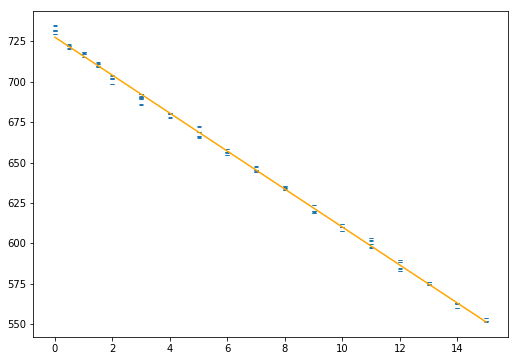

In [79]:
popt, pcov = curve_fit(linear, data[:,0], data[:,1])

plt.figure(figsize=(8.5,6))
plt.errorbar(data[:,0], data[:,1], yerr=u, elinewidth=1.0, capthick=1.0, capsize=2.0, fmt='none')
space = np.linspace(0,15,100)
plt.plot(space, linear(space, popt[0], popt[1]), color='orange')
plt.show()

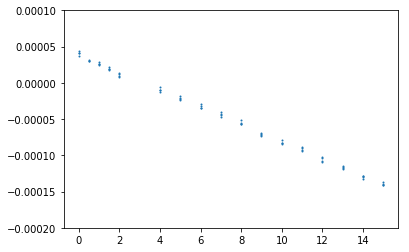

In [80]:
si_data = np.array([(item[0], item[1] * constant * gal) for item in data])
#print(si_data)


delta = delta_g(si_data)
plt.scatter(delta[:,0], delta[:,1], s=1**2)
plt.ylim(-0.0002,0.0001)
plt.show()   

In [81]:
r = np.mean(find_radius(delta[:,1], delta[:,0]))
r_earth = 6371 * 10**3

print((r-r_earth)/r_earth)

0.06554792930824374


In [82]:
delta_cut = []

for item in delta:
    if 3 <= item[0] <= 13: delta_cut.append((item[0], item[1]))
delta_cut = np.array(delta_cut)

r_cut = np.mean(find_radius(delta_cut[:,1], delta_cut[:,0]))

print((r_cut-r_earth)/r_earth)

0.10710003088502335
